# Inaugural Project
---

To start of we will import all libraries needed for the project. Furthermore we will import the economic model given from the lectures, though with one change. The change being that model defining $H$ has been defined as an if statement containing all functions for home productions compared to the orginal file where it was only defined for when $\sigma = 1$. (The change is on line 55). Furhtermore the discrete model is already given in the assignment.

Code below is nonexecutable code that shows what the code from line 55 in **HouseholdSpecializationModel.py**' has been changed from and to:


>**Before**
``` python
# b. home production
if par.sigma == 1:
    H = HM**(1-par.alpha)*HF**par.alpha
```

> **After**

```python
# b. home production
if par.sigma == 1:
    H = HM**(1-par.alpha)*HF**par.alpha
elif par.sigma == 0:
    H = np.minimum(HM,HF)
# We check if we divide by zero
elif HM == 0 or HF == 0:
    H = 0
else:
    H = (
        (1-par.alpha)*HM**((par.sigma-1)/par.sigma)
        +par.alpha*HF**((par.sigma-1)/par.sigma))
        **((par.sigma/(par.sigma-1))
          )
```

In [1]:
# Importing relevant libraries for mathematical calculations and data visulization
import numpy as np
from matplotlib import pyplot as plt

# Importing code for economic model
import HouseholdSpecializationModel as model

# Defining model as 'HouseholdSpecializationModelClass'
model = model.HouseholdSpecializationModelClass()

# Question 1

We want to see how different values for $\alpha$ and $\sigma$ effect the home production ratio between male and female, therefore it would make sense to graph this, so we have a visual image of how the ratio changes based on changes to $\alpha$ and/or $\sigma$. There are two ways to display this, one way would be to display this as a graph with 3 axes and another would be to display this as a line graph with 2 axes, where different lines represent different values of $\alpha$. In this case we choose the second option.

To do this, we can do the following steps:

1. Define 2 lists for each value of $\alpha$ and $\sigma$, and also define 2 empty lists for $H_M$ and $H_M$. 
2. Creating a for loop to solve the function for each value of $\alpha$ and $\sigma$, and storing it into the before mentioned empty lists.
3. Define a function to calculate the ratio of $\frac{H_F}{H_M}$.
4. Reshape the results into a matrix for $\frac{H_F}{H_M}$.
5. Create a for loop to calculate for each comination of $\alpha$ and $\sigma$.
6. Plot everything as line graph, where each line represents a value for $\alpha$. Here the x-axis will be $\sigma$ and the y-axis the $\frac{H_F}{H_M}$ ratio.

c:\Users\ketsi\OneDrive - University of Copenhagen\Desktop\3. semester\Introduction to programming and numerical analysis\projects-2023-kscd\inauguralproject\HouseholdSpecializationModel.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma/(par.sigma-1)))


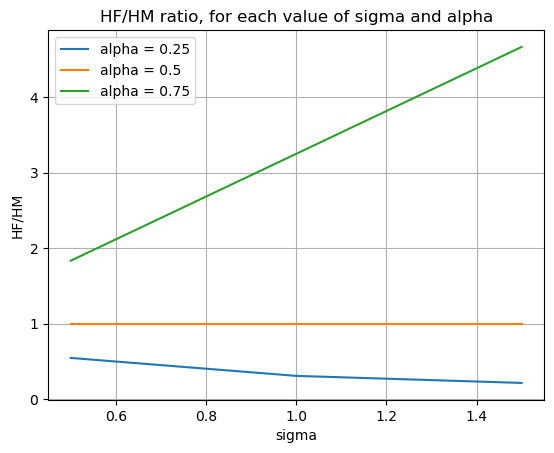

In [2]:
# Defining values for alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Creating empty lists for HF values and HM values
HF_values = []
HM_values = []

# Creating empty lists for HF/HM ratio
HF_HM_ratio = []

# Prining values 
for alpha in alpha_values:
    for sigma in sigma_values:
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        result = model.solve_discrete()

        # Appending values to list for HF and HM
        HF_values.append(result.HF)
        HM_values.append(result.HM)
        
        # Appending HF/HM ratio to the list
        HF_HM_ratio.append(result.HF/result.HM)

# Reshaping the HF/HM ratio list into a matrix
HF_HM_ratio = np.array(HF_HM_ratio).reshape((len(alpha_values), len(sigma_values)))

# Printing tuples (We have the code here, incase we need to see the values)
#print("HF values:", tuple(HF_values))
#print("HM values:", tuple(HM_values))

# Line plot for each value of alpha
for i, alpha in enumerate(alpha_values):
    plt.plot(sigma_values, HF_HM_ratio[i,:], label=f'alpha = {alpha}')
    
# Adding label names and graph titel
plt.xlabel('sigma')
plt.ylabel('HF/HM')
plt.title('HF/HM ratio, for each value of sigma and alpha')

# Adding a legends
plt.legend()

# Adding gridlines
plt.grid()

# Show the plot
plt.show()

# Printing HF/HM ratio (We have the code here, incase we need to see the values)
#print(HF_HM_ratio)

# Question 2

We want to see what kind of relationship there is between the female and male ratio of wages and the ratio between them in homeproduction. Here male wages are held constant whilst female wages are varying. Calculating the relation between the two is easy enough, though the problem lies with visualizing it. Since both $\alpha$ and $\sigma$ can have 3 different values and therefore 9 different values for $\log{\frac{H_F}{H_M}}$, it would mean that we need to create 1 for each value of $\log{\frac{H_F}{H_M}}$, in code this can become quickly unmanageble. Instead of doing this, we can create an interactive model, where we choose the values different values for $\alpha$ and $\sigma$ that were defined en Question 1.

To do this, we can do the following steps:

1. Import interact from ipywidgets, since we want to create an interactive model.
2. Define a list for all values of $w_F$ and a define the $w_M$.
3. Define a new function, with  $\alpha$ and $\sigma$ as the input.
4. Create 2 new empty lists for $\log{\frac{wF}{wM}}$ and $\log{\frac{H_F}{H_M}}$
5. Create a for loop to calculate $\log{\frac{wF}{wM}}$ and $\log{\frac{H_F}{H_M}}$ and append them to their respective lists.
6. Plot the graph as a line graph with dots, but not display it.
7. Make it into an interactive model, where the interactive variables are $\alpha$ and $\sigma$

In [3]:
# Importing ipywidgets for creating an interactive model
from ipywidgets import interact, fixed

# Defining given values for wF and wM
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
wM = 1.0

# Defining a function so the function can be plottet for any value of alpha and sigma, which has been defined
def interactive_plot(alpha, sigma):

    # Replacing previous values for alpha and sigma with the ones chosen in the interactive model
    model.par.alpha = alpha
    model.par.sigma = sigma
    
    # Creating empty lists for log(wF/wM) and log(HF/HM)
    log_wF_wM = []
    log_HF_HM = []

    # Calculate log(wF/wM) and log(HF/HM) for each value of wF
    for wF in wF_values:
        model.par.wF = wF
        model.par.wM = wM

        # Solving the model
        result = model.solve_discrete()

        # We append log(wF/wM) and log(HF/HM) to their corresponding lists
        log_wF_wM.append(np.log(wF/wM))
        log_HF_HM.append(np.log(result.HF/result.HM))

    # Create a scatter plot with the given data
    plt.scatter(log_wF_wM, log_HF_HM, marker='s')

    # Perform linear regression and plot the line
    slope, intercept = np.polyfit(log_wF_wM, log_HF_HM, 1)
    x_vals = np.array(log_wF_wM)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='red')

    # Adding label names and graph titel
    plt.xlabel('log(wF/wM)')
    plt.ylabel('log(HF/HM)')
    plt.title('Log HF/HM vs Log wF/wM')

    # Adding gridlines
    plt.grid()

# Creating the interactive model
interact(interactive_plot, alpha=alpha_values, sigma=sigma_values)


interactive(children=(Dropdown(description='alpha', options=(0.25, 0.5, 0.75), value=0.25), Dropdown(descripti…

<function __main__.interactive_plot(alpha, sigma)>

# Question 3

Just as in question 2, we want to see the relation between the female and male ratio of wages and ratio of homeproduction. The difference here being, that we now are looking at a continuous model and not a discrete model. This would mean that we first need to code the continuous model before anything else. To start of we will be using the optimize.minimize function from SciPy library. 

While the brutforce method is a possible approach, it can be very computationally expensive for solving complex models. Therefore it can be impractical and even (as in this case) impossible to calculate. In our case the brutforce method is in too computatioanlly expensive ($84601^4 \cdot 24$ bytes) and therfore opt to using the scipy.minimize method.

To define out continuous model, we can do the follwoing steps:

1. Define a new function for the continues model
2. Create guesses for $LM, LF, HM$ and $HF$. This is because we need a starting point in the model, for the function to work. This is because we are working with an optimization model, where the pattern search (Nelder-Mead) needs a starting point.
3. Define the negative value of the utility function as an objective, to be minimized later.
4. Define the maximum and minimum bounds for the model.
5. Crete a result through the scipy.optimize method using **the Neldor Mead** method.

Now that we have our conitnuous model, we can begin to code an interactive model, which follows the exact same steps as desribed in question 2.

Below is code for the continuous model:

> **Before**

```python
def solve(self,do_print=False):
        """ solve model continously """

        pass
```

> **After**

```python
    def solve_continuosly(self,do_print=False):
        """ solve model continously """
        par = self.par
        sol = self.sol
        opt = SimpleNamespace()

        # a. Making a guess for LM, LF, HM and HF
        LM_guess = 6
        LF_guess = 6
        HM_guess = 6
        HF_guess = 6
        x_guess = [LM_guess, LF_guess, HM_guess, HF_guess]

        # Create an objective.
        # The objective is a negative utility function, thereby to maximize this function we need to optimize.minimize it
        obj = lambda x: -self.calc_utility(x[0], x[1], x[2], x[3])

        # c. We define borders, i.e. maximum and minimum values
        bounds = ((1e-8, 24-1e-8), (1e-8, 24-1e-8), (1e-8, 24-1e-8), (1e-8, 24-1e-8))

        # d. Crete result thorugh Nelder-Meld method
        result = optimize.minimize(obj, x_guess, method='Nelder-Mead', bounds=bounds)

        opt.LM = result.x[0]
        opt.LF = result.x[1]
        opt.HM = result.x[2]
        opt.HF = result.x[3]

        # e. print
        if do_print:
            for k, v in opt.__dict__.items():
                print(f"{k} = {v:6.4f}")

        return opt 
```

In [4]:
# Defining a function so the function can be plottet for any value of alpha and sigma, which has been defined
def interactive_plot_2(alpha, sigma):

    # Replacing previous values for alpha and sigma with the ones chosen in the interactive model
    model.par.alpha = alpha
    model.par.sigma = sigma
    
    # Creating empty lists for log(wF/wM) and log(HF/HM)
    log_wF_wM = []
    log_HF_HM = []

    # Calculate log(wF/wM) and log(HF/HM) for each value of wF
    for wF in wF_values:
        model.par.wF = wF
        model.par.wM = wM

        # Solving the model
        result = model.solve_continuous()

        # We append log(wF/wM) and log(HF/HM) to their corresponding lists
        log_wF_wM.append(np.log(wF/wM))
        log_HF_HM.append(np.log(result.HF/result.HM))

    # Create a scatter plot with the given data
    plt.scatter(log_wF_wM, log_HF_HM, marker='s')

    # Perform linear regression and plot the line
    slope, intercept = np.polyfit(log_wF_wM, log_HF_HM, 1)
    x_vals = np.array(log_wF_wM)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='red')

    # Adding label names and graph titel
    plt.xlabel('log(wF/wM)')
    plt.ylabel('log(HF/HM)')
    plt.title('Log HF/HM vs Log wF/wM')

    # Adding gridlines
    plt.grid()

# Creating the interactive model
interact(interactive_plot_2, alpha=alpha_values, sigma=sigma_values)


interactive(children=(Dropdown(description='alpha', options=(0.25, 0.5, 0.75), value=0.25), Dropdown(descripti…

<function __main__.interactive_plot_2(alpha, sigma)>

# Question 4

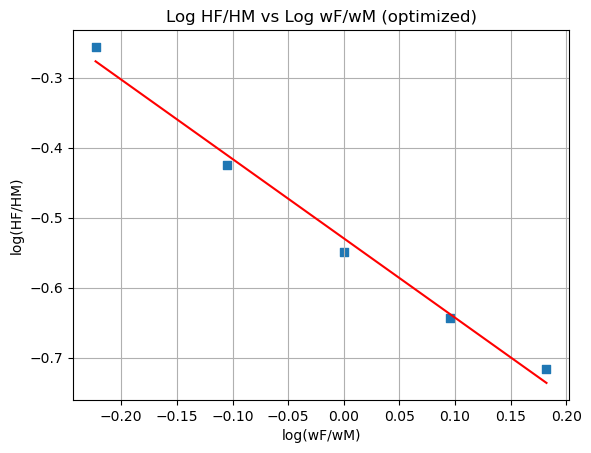

(0.25, 0.5)


In [7]:
def plot_optimized_results(model, alpha, sigma):
    # Set model parameters to given alpha and sigma
    model.par.alpha = alpha
    model.par.sigma = sigma

    # Prepare data for the plot
    log_wF_wM = []
    log_HF_HM = []

    for wF in model.par.wF_vec:
        model.par.wF = wF
        model.par.wM = 1.0

        result = model.solve_continuous()

        log_wF_wM.append(np.log(wF / model.par.wM))
        log_HF_HM.append(np.log(result.HF / result.HM))

    # Create a scatter plot with the given data
    plt.scatter(log_wF_wM, log_HF_HM, marker='s')

    # Perform linear regression and plot the line
    slope, intercept = np.polyfit(log_wF_wM, log_HF_HM, 1)
    x_vals = np.array(log_wF_wM)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color='red')

    # Add labels and title
    plt.xlabel('log(wF/wM)')
    plt.ylabel('log(HF/HM)')
    plt.title('Log HF/HM vs Log wF/wM (optimized)')

    # Add gridlines
    plt.grid()

    # Show the plot
    plt.show()

# Replace these values with the optimized alpha and sigma you obtained
optimized_alpha = 0.25
optimized_sigma = 0.5

plot_optimized_results(model, optimized_alpha, optimized_sigma)

optimized_alpha_sigma = model.estimate()

print(optimized_alpha_sigma)